# Final Project

# 1. Introduction

|  |  |
| --- | --- |
| Name | Bandoro, Bagus Septian |
| Batch | FTDS-013 |
| Project Name | Toko-Hunt |
| Project URL | http:// |
| Dataset | Web scrapping from tokopedia.com|
| Objective | To create an interface where dropshipper can access real time stats of online store products |

# 2. Dataset Description

The dataset that's used for the project derived from web scraping from one of the biggest e-commerce platform in Indonesia, tokopedia.com. The extracted information includes product name, product rating, price, the amount of rating given, amount of product sold, product condition, weight per unit, product category, product description, store name, store rating, and store location. 

Since there're dozens of product category at the site, we focused on only one categorie that are usually bought online in this case we'll use handphones.

# 3. Background

E-commerce has been one of the most favorable shopping option nowadays, and it keeps getting bigger every year. From groceries, electronics, to luxury items, everything can be bought online. It's estimated that there're 2.14 billion online shoppers worldwide, and it's accounted for 18% of all retail sales worldwide in 2020 (from 13.6% in 2019 and 7.4% in 2015). Besides of the stock availability and efficiency, cheaper price is also a big consideration why people buying online, this is because online stores doesn't have the cost of running a physical store (rent, electricity, etc). 

However, online shoppers are also faced by a challenge when determining which product to buy. The availability of huge amount of price options can be staggering for those who wants to reap the most benefit of buying goods online. Also, since cheaper products don't always lead to higher product qualities, keeping both price and customer reviews in check can be a lot of homework for online shoppers. And that's the primary reason of us developing our current project. This project will cover the subject of 'Comparison Shopping Engine' that can help online customers to pick which product to buy, it also can be used by retailers or dropshippers to determine their pricing strategy through looking at the current market information.

sources: https://www.drip.com/blog/e-commerce-statistics , https://www.thebalance.com/is-shopping-online-really-cheaper-939778 

# 4. Import Libraries

In [71]:
# Below are the libraries that will be used in this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import string
import pickle

# 5. Data Loading and Initial Preprocessing

Since the scraping was done in a few different session, we'll load the data using a few different csv files. 

In [72]:
# Load the data

data_1 = pd.read_csv('handphone_1.csv')
data_2 = pd.read_csv('handphone_2.csv')
data_3 = pd.read_csv('handphone_3.csv')
data_4 = pd.read_csv('handphone_4.csv')
data_5 = pd.read_csv('macbook_1.csv')
data_6 = pd.read_csv('lip_cream_1.csv')

Also the initial dataframes are not come with the same format, so we'll first reformat the dataframes before concatenating them altogether.

In [73]:
# rearrange and concat the data

description_1 = data_1['description']
data_1.drop(axis=1, columns=['image_2-src', 'image_3-src', 'image_4-src', 'image_5-src', 'description'], inplace=True)
data_1.rename(columns={'image_1-src': 'image-src'}, inplace=True)
data_1.insert(loc=15, column='description', value = description_1)
data_3.drop(axis=1, columns=['image_2-src', 'image_3-src', 'image_4-src', 'image_5-src'], inplace=True)
description_3 = data_3['description']
data_3.drop(axis=1, columns= ['description'], inplace=True)
data_3.insert(loc=15, column='description', value= description_3)
data_3.rename(columns={'image_1-src': 'image-src'}, inplace=True)
description_4 = data_4['description']
data_4.drop(axis=1, columns= ['description'], inplace=True)
data_4.insert(loc=15, column='description', value= description_4)
data_4.rename(columns={'image_1-src': 'image-src'}, inplace=True)
data_5.rename(columns={'image_1-src': 'image-src'}, inplace=True)
data_6.rename(columns={'image_1-src': 'image-src'}, inplace=True)
data = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6])
data.reset_index(drop=True, inplace=True)

In [74]:
# Show the data

data

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,product_rating,rating_amount,price,product_sold,condition,unit_weight,category,store_name,store_rating,store_location,description,image-src
0,1661437843-509,https://www.tokopedia.com/search?condition=1%2...,Samsung A03 3/32 New Garansi ResmiRp1.349.000C...,https://www.tokopedia.com/davidpremium/samsung...,Samsung A03 3/32 New Garansi Resmi - RANDOM,4.8,(26 rating),Rp1.349.000,Terjual 100+,Baru,400 g,Android OS,David Premium Store,4.9,Kota Tangerang,NaN,https://images.tokopedia.net/img/cache/100-squ...
1,1661445187-1028,https://www.tokopedia.com/search?condition=1%2...,Lagi TrendingXiaomi Redmi Note 10 5G 8/128 GB ...,https://www.tokopedia.com/gudang-hp/xiaomi-red...,Xiaomi Redmi Note 10 5G 8/128 GB Garansi Resmi...,5.0,(745 rating),Rp2.769.000,Terjual 1 rb+,Baru,500 g,Android OS,Gudang-HP,4.9,Jakarta Pusat,NaN,https://images.tokopedia.net/img/cache/100-squ...
2,1661436928-426,https://www.tokopedia.com/search?condition=1%2...,Lagi TrendingXiaomi Redmi 5a 2/16GB garansi 1 ...,https://www.tokopedia.com/yunishop00/xiaomi-re...,Xiaomi Redmi 5a 2/16GB garansi 1 Tahun - Kuning,4.8,(772 rating),Rp570.000,Terjual 1 rb+,Baru,400 g,Android OS,yunishop00,4.8,Jakarta Timur,NaN,https://images.tokopedia.net/img/cache/100-squ...
3,1661440039-711,https://www.tokopedia.com/search?condition=1%2...,Sisa 2OPPO A16 RAM 3/32 GARANSI RESMI INDONESI...,https://www.tokopedia.com/borneoindonesia7/opp...,OPPO A16 RAM 3/32 GARANSI RESMI INDONESIA TERM...,4.9,(231 rating),Rp1.655.000,Terjual 250+,Baru,500 g,Android OS,BORNEO INDONESIA,4.8,Jakarta Barat,NaN,https://images.tokopedia.net/img/cache/100-squ...
4,1661451307-1100,https://www.tokopedia.com/search?condition=1%2...,OPPO A3S 3/32 GBRp799.00041%Rp1.359.000Jakarta...,https://www.tokopedia.com/zhufujian/oppo-a3s-3...,"OPPO A3S 3/32 GB - Hitam, 4/64",4.8,(644 rating),Rp799.000,Terjual 1 rb+,Baru,500 g,Android OS,Zhufu jian,4.7,Jakarta Barat,NaN,https://images.tokopedia.net/img/cache/100-squ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,1661866680-873,https://www.tokopedia.com/search?navsource=&pa...,Maybelline Sensational liquid matteRp55.250Cas...,https://www.tokopedia.com/archive-jcstorekosme...,Maybelline Sensational liquid matte,5.0,(1 rating),Rp55.250,Terjual 1,Baru,120 Gram,Lip Cream,JC Store Kosmetik,4.9,Kota Semarang,Lip cream yang terasa nyaman dan ringan dibibi...,https://images.tokopedia.net/img/cache/100-squ...
4219,1661859672-647,https://www.tokopedia.com/search?navsource=&pa...,MAYBELLINE - Super Stay Matte Ink | Lip Cream ...,https://www.tokopedia.com/-aisstore/maybelline...,MAYBELLINE - Super Stay Matte Ink | Lip Cream ...,5.0,(4 rating),Rp82.500,Terjual 6,Baru,200 Gram,Lip Cream,Ais Store.,4.8,Kota Surabaya,Maybelline Superstay Matte Ink New Color\n\nMa...,https://images.tokopedia.net/img/cache/100-squ...
4220,1661858772-575,https://www.tokopedia.com/search?navsource=&pa...,MINERAL BOTANICA MATTE LIP SOFT CREAM - MAKEUP...,https://www.tokopedia.com/madamecantik/mineral...,MINERAL BOTANICA MATTE LIP SOFT CREAM - MAKEUP...,5.0,(4 rating),Rp53.550,Terjual 5,Baru,50 Gram,Lip Cream,MADAME CANTIK,4.7,Kota Surabaya,PINALTI PAKET RETURN : https://www.tokopedia.c...,https://images.tokopedia.net/img/cache/100-squ...
4221,1661867240-909,https://www.tokopedia.com/search?navsource=&pa...,Maybelline Superstay Matte Ink Liquid Lipstick...,https://www.tokopedia.com/orimsfoodcoffee/mayb...,Maybelline Superstay Matte Ink Liquid Lipstick...,4.8,(6 rating),Rp77.500,Terjual 12,Baru,100 Gram,Lip Cream,Orims,4.9,Jakarta Barat,READY ! \n\nMaybelline Superstay Matte Ink ada...,https://images.tokopedia.net/img/cache/100-squ...


The dataset is comprised of 3289 rows and 17 columns, each row represents a single product, and columns represent realtime information regarding the product name, product rating, price, the amount of rating given, amount of product sold, product condition, weight per unit, product category, product description, store name, store rating, and store location. The data was scraped on Monday, 29 August 2022 from tokopedia.com while using 'handphone' as the keyword and displaying products which were rated with 4 stars or more. 

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4223 entries, 0 to 4222
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      4223 non-null   object 
 1   web-scraper-start-url  4223 non-null   object 
 2   product                4223 non-null   object 
 3   product-href           4223 non-null   object 
 4   product_name           4218 non-null   object 
 5   product_rating         4188 non-null   float64
 6   rating_amount          4188 non-null   object 
 7   price                  4218 non-null   object 
 8   product_sold           4194 non-null   object 
 9   condition              4218 non-null   object 
 10  unit_weight            4218 non-null   object 
 11  category               4095 non-null   object 
 12  store_name             4218 non-null   object 
 13  store_rating           4218 non-null   float64
 14  store_location         4214 non-null   object 
 15  desc

There are a few column in the dataset that doesn't have correct data types assigned to them such as price, product sold and rating amount that have object data types instead of a numerical data types such as interger or float. We are going to reformat these column and assign the correct numerical data types on each column.

Before we convert the data to it's correct type, first we will need to clean the data in the target columns from missing value

In [76]:
# Dropping the missing value
data.dropna(subset=['product_sold'], inplace=True)
data.dropna(subset=['rating_amount'], inplace=True)
data.dropna(subset=['image-src'], inplace=True)
data.dropna(subset=['price'], inplace=True)

In [77]:
# Reseting index
data.reset_index(drop=True, inplace=True)

After cleansing each column of missing value we can now begin the preprocessing to convert the data to its correct assignment, first we need to use regex to isolate the number of product sold

In [78]:
# Converting rb to 000 in product_sold
sold = []
for i in range(len(data)):
  find = re.sub("\srb", "000", data['product_sold'].iloc[i])
  sold.append(find)

In [79]:
# Grab the numbers from product_sold
sold_rev = []
for i in range(len(data)):
    find = re.findall("(\d{1,6})", sold[i])
    sold_rev.append(find)

After isolating the number we will incorporate the regex result into the dataset and assign it's type to numeric

In [80]:
# Change the regex result into Dataframe
sold_rev = pd.DataFrame(sold_rev, columns=['sold'])

In [81]:
# Inserting the regex result into produt_sold
data['product_sold'] = np.array(sold_rev)  
data['product_sold'] = pd.to_numeric(data['product_sold'], errors= 'coerce')

Next we are going to do the same treatment with rating amount column and try to isolate the numbers in the data with the help of regex

In [82]:
# Deleting string form rating_amount
rating = []
for i in range(len(data)):
    find = re.sub("\srating", "", data['rating_amount'].iloc[i])
    rating.append(find)

In [83]:
# Deleting the brackets from rating_amount
rating_rev = []
for i in range(len(data)):
    find = re.sub("[\([{})\]]", "", rating[i],)
    rating_rev.append(find)

In [84]:
# Deleting the dot from rating amount
rate = []
for i in range(len(data)):
    find = re.sub("\.", "", rating_rev[i],)
    rate.append(find)

We will incorporate the rating amount regex result and incorporate it to the dataset then assing the data to numeric type

In [85]:
# Converting regex result to Dataframe
rate = pd.DataFrame(rate, columns=['rating'])

In [86]:
# Inserting regex result rating_amount
data['rating_amount'] = np.array(rate)
data['rating_amount'] = pd.to_numeric(data['rating_amount'], errors= 'coerce')

Last we are going to use regex to isolate the numbers in price data

In [87]:
# Deleting dot from price
price = []
for i in range(len(data)):
    find = re.sub("\.", "", data['price'].iloc[i])
    price.append(find)

In [88]:
# Deleting currency from price
price_rev = []
for i in range(len(data)):
    find = re.sub("Rp", "", price[i])
    price_rev.append(find)

We are going to incorporate the regex result to the dataset then change price data to numeric

In [89]:
# Converting regex result to Dataframe
prices = pd.DataFrame(price_rev, columns=['price'])

In [24]:
# Inserting regex result to price
data['price'] = np.array(prices)
data['price'] = pd.to_numeric(data['price'], errors= 'coerce')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178 entries, 0 to 4177
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      4178 non-null   object 
 1   web-scraper-start-url  4178 non-null   object 
 2   product                4178 non-null   object 
 3   product-href           4178 non-null   object 
 4   product_name           4178 non-null   object 
 5   product_rating         4178 non-null   float64
 6   rating_amount          4178 non-null   int64  
 7   price                  4178 non-null   int64  
 8   product_sold           4178 non-null   int64  
 9   condition              4178 non-null   object 
 10  unit_weight            4178 non-null   object 
 11  category               4055 non-null   object 
 12  store_name             4178 non-null   object 
 13  store_rating           4178 non-null   float64
 14  store_location         4174 non-null   object 
 15  desc

Now all of the columns have all assigned with the correct data types

In [22]:
data['image-src'].iloc[0]

'https://images.tokopedia.net/img/cache/100-square/VqbcmM/2022/4/18/005f9b18-d09e-4a7b-a06f-155f22e20c91.jpg.webp?ect=4g'

We found that there's a date of the product posting in the image URL, so we are going to take the data using regex and make a new column for the product posting date based on it.

In [23]:
# Fetching date from image url
date = []
for i in range(len(data)):
    find = re.findall("[0-9][0-9][0-9][0-9]/[0-9]{1,2}/[0-9]{1,2}", data['image-src'].iloc[i])
    date.append(find)

After we are done isolating the date posting data with regex, we will incorporate it to the dataset and assign its type to
 datetime data types

In [25]:
# Converting regex result to Dataframe
date = pd.DataFrame(date, columns=['date'])

In [26]:
# Inserting regex result to date
data['date'] = date

In [27]:
# Converting date to datetime format
data['date'] = pd.to_datetime(data['date'])

Before doing a further analysis with the data, we are going to do a checking for missing value in the dataset

In [29]:
data.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
product                     0
product-href                0
product_name                0
product_rating              0
rating_amount               0
price                       0
product_sold                0
condition                   0
unit_weight                 0
category                  123
store_name                  0
store_rating                0
store_location              4
description              1116
image-src                   0
date                        0
dtype: int64

Missing values was found in category column and description column. Missing value from the dataset might happen because an error when doing the data collection via web scraping. So we conclude that the missing value found in the dataset are missing value completely at random (MCAR). For handling the missing value since it's MCAR we will remove it from the dataset.

In [30]:
# Dropping the missing value
data.dropna(subset=['category'], inplace=True)

In [92]:
# Reseting the index after droping the missing value to normalize dataset index
data.reset_index(drop=True, inplace=True)

In [32]:
# Show the dataset after preprocessing
data

,web-scraper-order,web-scraper-start-url,product,product-href,product_name,product_rating,rating_amount,price,product_sold,condition,unit_weight,category,store_name,store_rating,store_location,description,image-src,date
0,1661437843-509,https://www.tokopedia.com/search?condition=1%2...,Samsung A03 3/32 New Garansi ResmiRp1.349.000C...,https://www.tokopedia.com/davidpremium/samsung...,Samsung A03 3/32 New Garansi Resmi - RANDOM,4.8,26,1349000,100,Baru,400 g,Android OS,David Premium Store,4.9,Kota Tangerang,NaN,https://images.tokopedia.net/img/cache/100-squ...,2022-04-18
1,1661445187-1028,https://www.tokopedia.com/search?condition=1%2...,Lagi TrendingXiaomi Redmi Note 10 5G 8/128 GB ...,https://www.tokopedia.com/gudang-hp/xiaomi-red...,Xiaomi Redmi Note 10 5G 8/128 GB Garansi Resmi...,5.0,745,2769000,1000,Baru,500 g,Android OS,Gudang-HP,4.9,Jakarta Pusat,NaN,https://images.tokopedia.net/img/cache/100-squ...,2021-08-26
2,1661436928-426,https://www.tokopedia.com/search?condition=1%2...,Lagi TrendingXiaomi Redmi 5a 2/16GB garansi 1 ...,https://www.tokopedia.com/yunishop00/xiaomi-re...,Xiaomi Redmi 5a 2/16GB garansi 1 Tahun - Kuning,4.8,772,570000,1000,Baru,400 g,Android OS,yunishop00,4.8,Jakarta Timur,NaN,https://images.tokopedia.net/img/cache/100-squ...,2021-04-12
3,1661440039-711,https://www.tokopedia.com/search?condition=1%2...,Sisa 2OPPO A16 RAM 3/32 GARANSI RESMI INDONESI...,https://www.tokopedia.com/borneoindonesia7/opp...,OPPO A16 RAM 3/32 GARANSI RESMI INDONESIA TERM...,4.9,231,1655000,250,Baru,500 g,Android OS,BORNEO INDONESIA,4.8,Jakarta Barat,NaN,https://images.tokopedia.net/img/cache/100-squ...,2021-07-22
4,1661451307-1100,https://www.tokopedia.com/search?condition=1%2...,OPPO A3S 3/32 GBRp799.00041%Rp1.359.000Jakarta...,https://www.tokopedia.com/zhufujian/oppo-a3s-3...,"OPPO A3S 3/32 GB - Hitam, 4/64",4.8,644,799000,1000,Baru,500 g,Android OS,Zhufu jian,4.7,Jakarta Barat,NaN,https://images.tokopedia.net/img/cache/100-squ...,2022-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,1661866680-873,https://www.tokopedia.com/search?navsource=&pa...,Maybelline Sensational liquid matteRp55.250Cas...,https://www.tokopedia.com/archive-jcstorekosme...,Maybelline Sensational liquid matte,5.0,1,55250,1,Baru,120 Gram,Lip Cream,JC Store Kosmetik,4.9,Kota Semarang,Lip cream yang terasa nyaman dan ringan dibibi...,https://images.tokopedia.net/img/cache/100-squ...,2020-11-09
4051,1661859672-647,https://www.tokopedia.com/search?navsource=&pa...,MAYBELLINE - Super Stay Matte Ink | Lip Cream ...,https://www.tokopedia.com/-aisstore/maybelline...,MAYBELLINE - Super Stay Matte Ink | Lip Cream ...,5.0,4,82500,6,Baru,200 Gram,Lip Cream,Ais Store.,4.8,Kota Surabaya,Maybelline Superstay Matte Ink New Color\n\nMa...,https://images.tokopedia.net/img/cache/100-squ...,2021-11-27
4052,1661858772-575,https://www.tokopedia.com/search?navsource=&pa...,MINERAL BOTANICA MATTE LIP SOFT CREAM - MAKEUP...,https://www.tokopedia.com/madamecantik/mineral...,MINERAL BOTANICA MATTE LIP SOFT CREAM - MAKEUP...,5.0,4,53550,5,Baru,50 Gram,Lip Cream,MADAME CANTIK,4.7,Kota Surabaya,PINALTI PAKET RETURN : https://www.tokopedia.c...,https://images.tokopedia.net/img/cache/100-squ...,2021-11-06
4053,1661867240-909,https://www.tokopedia.com/search?navsource=&pa...,Maybelline Superstay Matte Ink Liquid Lipstick...,https://www.tokopedia.com/orimsfoodcoffee/mayb...,Maybelline Superstay Matte Ink Liquid Lipstick...,4.8,6,77500,12,Baru,100 Gram,Lip Cream,Orims,4.9,Jakarta Barat,READY ! \n\nMaybelline Superstay Matte Ink ada...,https://images.tokopedia.net/img/cache/100-squ...,2021-11-25


Now that the dataset has been cleared of any missing values and has all of its column assigned with the correct data types we are going to save the final dataset for the model deployment.

In [33]:
# Saving the final dataset as zip file
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data.to_csv('out.zip', index=False,
          compression=compression_opts) 

In [34]:
# Assing file saving directory
from pathlib import Path  
filepath = Path('folder/subfolder/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath)  

# 6. Exploratory Data Analysis (EDA)

In [35]:
data['product_name'].value_counts()

INFINIX HOT 11S NFC 6/128 RAM 6GB ROM 128GB GARANSI RESMI - POLAR BLACK                          4
xiaomi redmi 9c 4/64 garansi resmi                                                               4
infinix hot 11 play 4/64                                                                         4
iPhone 13 Pro | 13 Pro Max 128GB 256GB 512GB 1TB Green DUAL/IBOX Resmi - 13 PRO SINGLE, 128GB    4
INFINIX Hot 12i 4/64 GB - 7GB Extended RAM - 6.6 IPS HD+ Garansi Resmi - Racing Black            4
                                                                                                ..
MAXTRON S11 GALAXY 4G 4/32 GB 100% ORIGINAL GARANSI RESMI MAXTRON 1 TH - Hijau                   1
Xiaomi Redmi 9A 2/32 RAM 2GB ROM 32GB GARANSI RESMI - BLUE                                       1
VIVO Y33t RAM 12GB 8GB+4GB extended ROM 128GB 12/128 8/128 GB RESMI - non bonus, starry gold     1
Xiaomi Poco M4 Pro Smartphone (6/128GB) Garansi Resmi - Yellow                                   1
MAYBELLINE

Product name doesn't have uniform format, therefore it's difficult to analyze each products accurately since there are variance in it's names

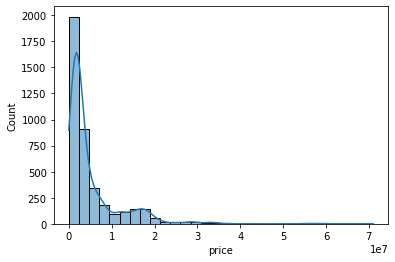

In [36]:
sns.histplot(data['price'], bins=30, kde=True)

Price distribution are positively skewed. Which means most of the product price are on the lower amount.

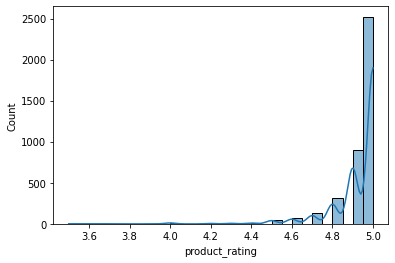

In [37]:
sns.histplot(data['product_rating'], bins=30, kde=True)

Most of the product in the dataset got a 5 star rating from the customer. We can conclude that most of the product that are sold at the store are of high quality and satisfy the customer.

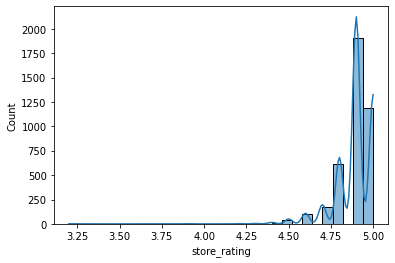

In [38]:
sns.histplot(data['store_rating'], bins=30, kde=True)

Most of the store receive a 4.9 star rating from the customer. That means most of the customer are satisfied with their experience shopping with the store. These high reviews also means that most of the store in the dataset have high credibility and are trusted by the customer.



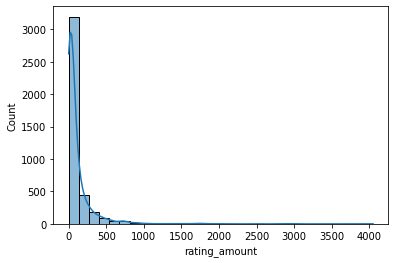

In [39]:
sns.histplot(data['rating_amount'], bins=30, kde=True)

Not many customer submit a review about the store service experience after having a transaction.

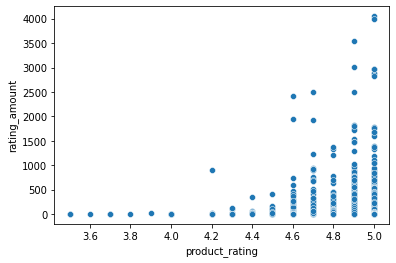

In [40]:
sns.scatterplot(x='product_rating' , y='rating_amount', data=data)

We can see from the graph that most customer who leaves a review submit a 5 star rating to the product. We can conclude that a lot of customer are satisfied with their product bought from the store.

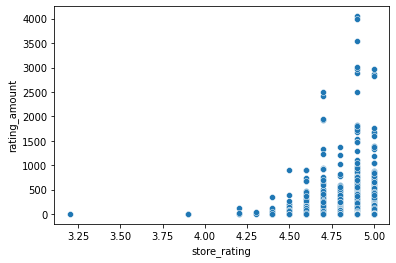

In [41]:
sns.scatterplot(x='store_rating' , y='rating_amount', data=data)

We found that store rating from the dataset range from 4.3 to 5.0. This shows that the customer are generally satisfied with their transaction experience at the e-commerce store.

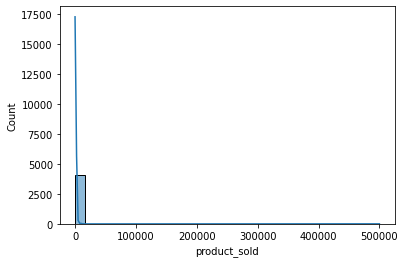

In [42]:
sns.histplot(data['product_sold'], bins=30, kde=True)

Most of the store in the dataset only ever sold a low amount of product

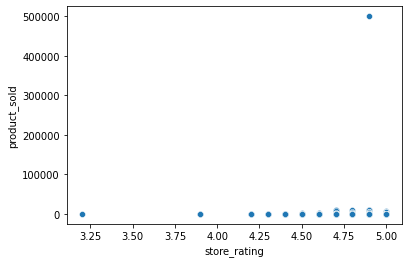

In [43]:
sns.scatterplot(x='store_rating' , y='product_sold', data=data)

Most of the store did not sell a high number of products, but a store with high rating are capable of selling their product in large quantity. This also shows that there's a lot of customer who are more likely to make a transaction at a store with a high rating.

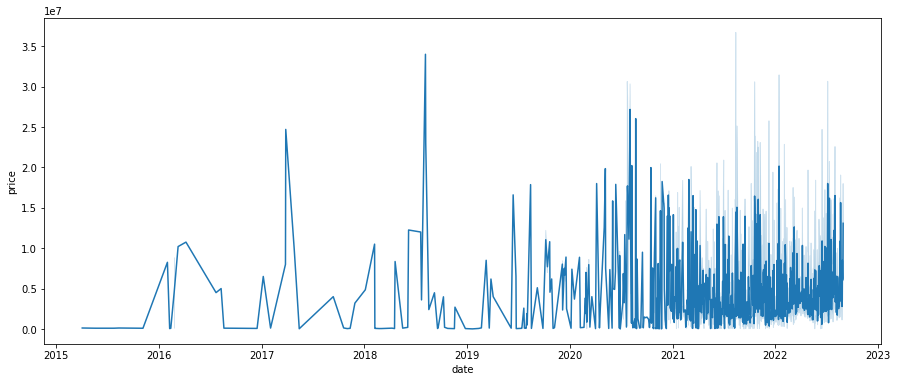

In [44]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='price', data=data)

Most product are sold fairly recently and only a handful of product are sold from quite a while ago. Product prices fluctuate with each date but the prices trend show neither decreassing trend nor increasing trend.

# 7. Data Preprocessing

In this project we are going to use product name as an input for the recommendation model to look for similar product, so we are going to do data preprocessing for product name

## Preprocessing product_name

In [45]:
product_names = data['product_name']
product_names = pd.DataFrame(product_names)

There are two things that we'll use as the preprocessing method, they are lowercase and removing all the symbols from the product_name.

In [46]:
# create a function for data preprocessing

def preprocessing(product):
    product = product.lower()
    product = re.sub("\W", " ", product)
    return product

In [47]:
product_names['product_name'] = product_names['product_name'].astype(str)

In [48]:
# apply preprocessing function

product_names['new_product_name']= product_names['product_name'].apply(lambda x: preprocessing(x))

In [49]:
product_names

,product_name,new_product_name
0,Samsung A03 3/32 New Garansi Resmi - RANDOM,samsung a03 3 32 new garansi resmi random
1,Xiaomi Redmi Note 10 5G 8/128 GB Garansi Resmi...,xiaomi redmi note 10 5g 8 128 gb garansi resmi...
2,Xiaomi Redmi 5a 2/16GB garansi 1 Tahun - Kuning,xiaomi redmi 5a 2 16gb garansi 1 tahun kuning
3,OPPO A16 RAM 3/32 GARANSI RESMI INDONESIA TERM...,oppo a16 ram 3 32 garansi resmi indonesia term...
4,"OPPO A3S 3/32 GB - Hitam, 4/64",oppo a3s 3 32 gb hitam 4 64
...,...,...
4050,Maybelline Sensational liquid matte,maybelline sensational liquid matte
4051,MAYBELLINE - Super Stay Matte Ink | Lip Cream ...,maybelline super stay matte ink lip cream ...
4052,MINERAL BOTANICA MATTE LIP SOFT CREAM - MAKEUP...,mineral botanica matte lip soft cream makeup...
4053,Maybelline Superstay Matte Ink Liquid Lipstick...,maybelline superstay matte ink liquid lipstick...


## Define corpus

Since the data for product name is in a string format and the algorithm can only process data in a numerical format we are going to convert the text from product name to number with the help of CountVectorizer

In [50]:
# Assingning preprocessed product name as corpus
corpus = product_names['new_product_name'].tolist()

In [51]:
# Define the vectorizer
vectorizer = CountVectorizer()

In [52]:
# Transforming the corpus with vectorizer
product_names_vect = vectorizer.fit_transform(corpus)

In [53]:
# Checking the words vectorizer result
vectorizer.vocabulary_

{'samsung': 1528,
 'a03': 322,
 '32': 159,
 'new': 1282,
 'garansi': 789,
 'resmi': 1489,
 'random': 1462,
 'xiaomi': 1810,
 'redmi': 1472,
 'note': 1300,
 '10': 17,
 '5g': 237,
 '128': 48,
 'gb': 794,
 'hijau': 878,
 '5a': 234,
 '16gb': 84,
 'tahun': 1666,
 'kuning': 998,
 'oppo': 1335,
 'a16': 330,
 'ram': 1457,
 'indonesia': 914,
 'termurah': 1686,
 'perak': 1382,
 'a3s': 348,
 'hitam': 880,
 '64': 252,
 '9a': 316,
 'abu': 370,
 'iphone': 935,
 'plus': 1399,
 'fullset': 768,
 'second': 1543,
 'original': 1342,
 '100': 18,
 'mulus': 1229,
 'like': 1020,
 '32gb': 164,
 'batang': 439,
 'infinix': 917,
 'hot': 884,
 '11': 29,
 'play': 1396,
 '64gb': 256,
 'biru': 476,
 'vivo': 1777,
 'v23e': 1764,
 'f1s': 721,
 'reno': 1478,
 '4g': 197,
 '256': 133,
 'orange': 1337,
 'y21s': 1827,
 '128gb': 54,
 'gb128': 795,
 'putih': 1445,
 'y21': 1825,
 'white': 1789,
 'non': 1294,
 'bundle': 518,
 'galaxy': 781,
 'core': 588,
 'sein': 1548,
 'ibox': 898,
 '13': 60,
 'pro': 1425,
 'max': 1104,
 '256g

In [54]:
pd.set_option("display.max.columns", None)

In [55]:
# Showing vectorizer result
pd.DataFrame(product_names_vect.toarray(), columns=vectorizer.get_feature_names_out())

000119  000mah  01  01red  02  02eternalsunset  02joyful  03  03s  04  \
0          0       0   0      0   0                0         0   0    0   0   
1          0       0   0      0   0                0         0   0    0   0   
2          0       0   0      0   0                0         0   0    0   0   
3          0       0   0      0   0                0         0   0    0   0   
4          0       0   0      0   0                0         0   0    0   0   
...      ...     ...  ..    ...  ..              ...       ...  ..  ...  ..   
4050       0       0   0      0   0                0         0   0    0   0   
4051       0       0   0      0   0                0         0   0    0   0   
4052       0       0   0      0   0                0         0   0    0   0   
4053       0       0   0      0   0                0         0   0    0   0   
4054       0       0   0      0   0                0         0   0    0   0   

      05  06  07  08  09  0951  0ghz  10  100  105  106  107  108mp  10a  10c  \
0      0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
1      0   0   0   0   0     0     0   1    0    0    0    0      0    0    0   
2      0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
3      0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
4      0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
...   ..  ..  ..  ..  ..   ...   ...  ..  ...  ...  ...  ...    ...  ...  ...   
4050   0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
4051   0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
4052   0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
4053   0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   
4054   0   0   0   0   0     0     0   0    0    0    0    0      0    0    0   

      10core  10forever  10s  10th  11  110  1115g4  1135g7  1165g7  117  \
0          0          0    0     0   0    0       0       0       0    0   
1          0          0    0     0   0    0       0       0       0    0   
2          0          0    0     0   0    0       0       0       0    0   
3          0          0    0     0   0    0       0       0       0    0   
4          0          0    0     0   0    0       0       0       0    0   
...      ...        ...  ...   ...  ..  ...     ...     ...     ...  ...   
4050       0          0    0     0   0    0       0       0       0    0   
4051       0          0    0     0   0    0       0       0       0    0   
4052       0          0    0     0   0    0       0       0       0    0   
4053       0          0    0     0   0    0       0       0       0    0   
4054       0          0    0     0   0    0       0       0       0    0   

      11in  11inc  11inch  11inchi  11s  11t  12  120  1205  120hz  1240p  \
0        0      0       0        0    0    0   0    0     0      0      0   
1        0      0       0        0    0    0   0    0     0      0      0   
2        0      0       0        0    0    0   0    0     0      0      0   
3        0      0       0        0    0    0   0    0     0      0      0   
4        0      0       0        0    0    0   0    0     0      0      0   
...    ...    ...     ...      ...  ...  ...  ..  ...   ...    ...    ...   
4050     0      0       0        0    0    0   0    0     0      0      0   
4051     0      0       0        0    0    0   0    0     0      0      0   
4052     0      0       0        0    0    0   0    0     0      0      0   
4053     0      0       0        0    0    0   0    0     0      0      0   
4054     0      0       0        0    0    0   0    0     0      0      0   

      126  1272  128  1280  128b  128blue  128g  128g8  128gb  128gbgaransi  \
0       0     0    0     0     0        0     0      0      0             0   
1       0     0    1     0     0        0     0      0      0             0   
2       0

After we done converting the text data into numerical value we will use euclidean distance algorithm to map the distance of each words of text in the dataset.

In [56]:
distance = []

for f in product_names_vect:
    distance.append(euclidean_distances(product_names_vect[0], f).tolist()[0][0])

distance = pd.Series(distance)
distance[distance < np.percentile(distance, 5)].sort_values()

0       0.000000
1577    1.000000
3083    1.000000
91      1.414214
362     1.414214
          ...   
575     2.645751
1538    2.645751
594     2.645751
1652    2.645751
1354    2.645751
Length: 137, dtype: float64

In [57]:
np.percentile(distance, 5)

2.8284271247461903

In [58]:
distance.sort_values()[0:50].index

Int64Index([   0, 3083, 1577,  362,   91,  459,  364, 1541,  299,  310,  874,
            1520, 2368, 2150, 2992, 1043, 1535, 2959,  213,  638,  590,  437,
            1282,   12,  173, 3212, 1337,  380,  151,  663, 2690, 2686, 3073,
            2294, 2782, 2855,  956, 3097,  778,  951,  775, 2532,  771, 2552,
            2842, 2418,  486, 2517, 2539, 1418],
           dtype='int64')

After we got the list of each words euclidean distance we will define a function to look for the similarity of the product name based on the calculation of its euclidean distance similarity.

In [59]:
def find_similarity(input_vect):
    distance = []
    for f in product_names_vect:
        distance.append(euclidean_distances(input_vect, f).tolist()[0][0])
    distance = pd.Series(distance) #.sort_values()[0:100].index
    distance = distance[distance < np.percentile(distance, 2)].sort_values()
    distance_index = distance.index
    return distance_index

We will save all the function needed for data preprocessing, vectorizer and similarity algorithm for model deployment

In [60]:
# save preprocessing, vectorizer and find similarity function

with open('preprocessing_hp.pkl', 'wb') as file_1:
  pickle.dump(preprocessing, file_1)

with open('vectorizer_hp.pkl', 'wb') as file_2:
  pickle.dump(vectorizer, file_2)

with open('find_similarity_hp.pkl', 'wb') as file_3:
  pickle.dump(find_similarity, file_3)

# Inference

We will be doing a data inference with similarity algorithm fuction that we have define before and evaluating the similarity algorithm fucntion result.

In [61]:
# inference

chat = input("Input nama produk : ")
print("Input nama produk:" , chat)
chat = preprocessing(chat)
chat = vectorizer.transform([chat])
index_serupa = find_similarity(chat)
produk_serupa = data['product_name'].iloc[index_serupa]
print("Produk serupa :\n", produk_serupa)

Input nama produk : Xiaomi Redmi Note 10 5G 8/128
Input nama produk: Xiaomi Redmi Note 10 5G 8/128
Produk serupa :
 2544                        xiaomi redmi note 10 5g 8/128
3080                                 Xiaomi redmi note 10
2821                                        Redmi Note 10
2325                          xiaomi redmi note 10s 8/128
383                            XIAOMI REDMI NOTE 11 6/128
462                            xiaomi redmi note 11 4/128
1       Xiaomi Redmi Note 10 5G 8/128 GB Garansi Resmi...
1412                       xiaomi redmi note 11 nfc 6/128
1494                                  redmi 10 6/128 2022
1503             Xiaomi redmi note 11 pro 5g 8/128 - Blue
2515                  xiaomi redmi note 11 4/128 - Normal
2750           xiomi redmi note 10 5g 8 128.garansi resmi
333                                          redmi note 9
3036                        redmi note 10 pro 8/128 resmi
1284                                  redmi note 11 4/128
2410          

Now after we get the product name recommendation from similarity algorithm function we will try to query the recommended product name price that will be used as the price recommendation

In [62]:
price_rec = data['price'].iloc[produk_serupa.index]
price_rec

2544    2700000
3080    2850000
2821    4000000
2325    2725000
383     2680000
462     2375000
1       2769000
1412    2715000
1494    2350000
1503    3999000
2515    2384999
2750    2745000
333     2000000
3036    3499000
1284    2364000
2410    3994900
2240    2399499
2197    2365000
2802    2678900
1478    2760000
1476    2599000
3047    1989000
2730    2770000
3081     368000
785     2351000
155     2374900
1000    2710000
897     2370000
890     2377500
859     4049000
521     2743000
134     1975000
2947    2750000
249     2449000
291     1999000
456     2751000
520     3010000
2616    1479000
2521     375000
1276    1929000
2467    1549999
1279    1910000
806     2760000
2285    1967000
2226    4054000
1040    2375000
1051    2765000
1174    2689000
1372    2429999
1255    1150000
751     2356900
1336    2713000
Name: price, dtype: int64

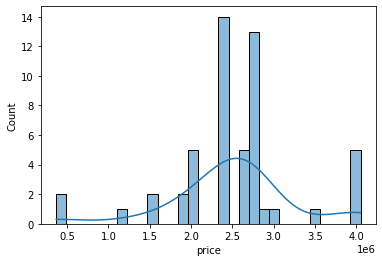

In [63]:
# Visualizing model recommendation distribution
sns.histplot(price_rec, bins=30, kde=True)

In [64]:
# Model recommendation mean
price_rec.mean()

2509473.0

In [65]:
# Phone price mean data
data[data['product_name'].str.contains('Xiaomi Redmi Note 10 5G 8/128')][['price']].mean()

price    2.753909e+06
dtype: float64

Price recommendation from the model range from 300000 to 4000000 with average recommendation orice of 2509473. Model recommendation has quite big price range because model recommendation output also recommend a different kind of phone so there are different price included in the calculation. Model recommendation price mean of 2509473 doesn't differ much from the average phone price of 2754900. So we can conclude that model price recommendation are quite good. 

We will do a query for store name, store rating, rating amount, product sold and product href from the dataset based on the recommended product names. Store name and store rating query will be used as the store recommendation. Product sold will be used to give the user more comprehensive information about their product demand. Product h-ref query will be used to give user acces for the recommended store.

In [66]:
store_rec = data[['store_name', 'store_rating','rating_amount', 'product_sold', 'product-href']].iloc[produk_serupa.index]
store_rec

,store_name,store_rating,rating_amount,product_sold,product-href
2544,Rollen ponsel,4.9,22,70,https://www.tokopedia.com/rollen/xiaomi-redmi-...
3080,duatitiktiga,5.0,29,100,https://www.tokopedia.com/duatitiktiga/xiaomi-...
2821,Abtyan Store,4.9,92,100,https://www.tokopedia.com/abtyan-store/redmi-n...
2325,Sultan Gadget Store Semarang,5.0,100,100,https://www.tokopedia.com/sultangadgetstore/xi...
383,piandra,4.9,36,100,https://www.tokopedia.com/piandrastore/xiaomi-...
462,FirsShop.,5.0,19,90,https://www.tokopedia.com/firsshoop/xiaomi-red...
1,Gudang-HP,4.9,745,1000,https://www.tokopedia.com/gudang-hp/xiaomi-red...
1412,Sultan Gadget Store Semarang,5.0,28,70,https://www.tokopedia.com/sultangadgetstore/xi...
1494,Sultan Gadget Store Semarang,5.0,12,50,https://www.tokopedia.com/sultangadgetstore/re...
1503,Eagle15,5.0,32,50,https://www.tokopedia.com/eagle15/xiaomi-redmi...


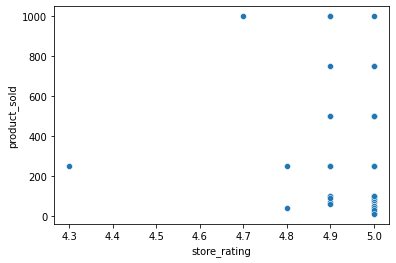

In [67]:
sns.scatterplot(x='store_rating', y='product_sold', data=store_rec)

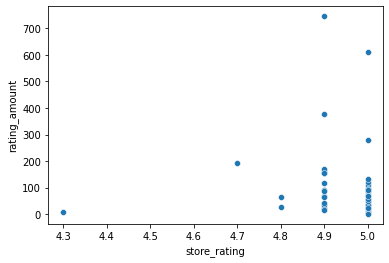

In [68]:
sns.scatterplot(x='store_rating', y='rating_amount', data=store_rec)

Most of the store recommendation from the model has low amount of product sold. That's because most store have low amount of product sold in the dataset. But in the model recommendation there are also recommendation of store with high amount of product sold.

Model store recommendation shows store with rating range from 4.3 to 5 with most recommended store have 4.9 star rating. Most of the store recommended by the model have a high customer submiting rating with 4.9 and 5 star rating. So we can conclude that model recommend store with good performance and high credibility

# Conclusion

## EDA Analysis

Product name writing format differ form store to store, so we can't analyze each product performance based on name accurately, rather we use the help of similarity algorithm to group product with similar name to analyze it's performance.

Most product at the dataset are sold quite cheap. This might be because there are a lot of online store selling the same product in e-commerce platform so they adjust their price on the lower end to have a competitive selling point for their product.

Customer are more likely to rate their product purchase with a high rating. This shows that the product sold in e-commerce platform are mostly of high quality and customer are satisfied with the product they bought.

Most customer submit high rating review to the online store in the dataset. this means that the customer are generally  satisfied with the store service experience.

Most store receive only a few amount of review submitted by the customer. But from earlier finding we know that the customer mostly submit a very high rating to the store. So we conclude that most customer didn't realy submit a review to the store unless they are really satisfied with their shopping experience at the online store.

We found that most of the store only ever sold a few amount of product in the dataset. This might be because the fierce competitiveness of the e-commerce market where customer are provided with a variety of product from various different store in the platform in one go that there are only a few chances for the only store to bevisited by the customer.

The prices of product was found to fluctuate with each posting date. But shows no trends of decreasing or increasing. Most of the product are posted fairly recently with a few exception of product that has been posted from a while ago

## Model Analysis

Model in this project are build using similarity algorithm. Model recommendation works by evaluating similarity of product name input and product name from the dataset. Form the evaluation model will present a few product name with high similarity to product as recommendation. Then price query will be addded to look at the price of recommended product and present them as the price recommendation. A second query was also added for store rating and and will find the store rating that sold the same product name as the product name recommended by the model. The information gained from the query will be used as the basis as the store recomendation to the user. Another query to be added in the recommendation model are query for product rating, product sold, and store link. Product rating and product sold will be used to give the user a more holistic information of the product they're searching and the store link will be used to give the user acces to the store that sold the product recommended by the model.

This model was evaluated by analyzing its recommendation using a simple EDA aproach like comparing the average price recommendation of the model and the average of the product price from the dataset. Model was also evaluated by looking at the store rating from the recommended product names. The result of model evaluation show that model price recommendation average doesn't show much difference from the the product average price from the dataset. The evaluation for store recommendation shows that model recommended store with a high rating.

Despite having able to recommend a good average price and good store to buy the product the model still has limitation. From the EDA done with the model product name recommendation, we found that the model also recommend a different kind of product name that are not the matching with the intended product name input. This made the model recommendation price range really big and less accurate.

Form the model evaluation we can conclude that the model are capable of presenting good recommedation to the user and can be used as a tool to help user product purchasing decision on an online store.

Should there be more resource and time allocated to improve the model, we would like to retrieve a bigger dataset with more product variance. We also want to scrape data from multiple e-commerce platform for a more comprehensive price comparison. We would also like to scrape data of store with lower rating because the data we used now have mostly high rating so the model will always recommend a store with good rating. We need data from the lower rating store to have a better comparison beetwen the good store and bad store. We also want to categorize the store as newcomers store and established store. Store with low rating and low product sold might be less likely to be visited and recommended eventhough newcomers store might offer good product and service, with the categorization we hope to be able to reach these newcomers store more often. Another improvement we like to make is to implement computer vision for customer product search so customer are able to search for product that are hard to describe by words. We would also like to retrieve product sales data to make a demand forecasting feature so the user are able to know the product worth better. Lastly we would like  for the model to be integrated with the e-commerce database to be able to recommend product from their database.
